In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
udp_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\UDP_resample_4000.csv')
udp_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.025978,-0.119415,-0.495813,-0.005438,-0.515642,-0.002646,-0.423139,0.371911,0.083769,-0.951297,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
1,0.025978,0.019019,0.059450,-0.005438,0.019607,-0.002646,-0.616152,-0.670846,-0.653085,0.440479,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
2,0.025978,0.162140,0.614713,-0.005438,0.589549,-0.002646,0.155901,-0.879398,-0.696430,1.217554,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
3,0.025978,0.018732,0.059450,-0.005438,0.019607,-0.002646,-0.616152,-0.670846,-0.653085,0.440479,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
4,0.025978,0.162946,0.614713,-0.005438,0.589549,-0.002646,0.155901,-0.879398,-0.696430,1.217554,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0.025978,-0.119415,-0.495813,-0.005438,-0.502426,-0.002646,-0.165788,0.557290,0.314939,-0.951297,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
3675,0.025978,0.018761,0.059450,-0.005438,0.052647,-0.002646,0.027225,-0.670846,-0.364123,1.154210,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
3676,0.025978,-0.119415,-0.495813,-0.005438,-0.472690,-0.002646,0.413252,0.974393,0.835071,-0.951297,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
3677,0.025978,-0.119410,-0.495813,-0.005438,-0.472690,-0.002646,0.413252,0.974393,0.835071,-0.951297,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1


In [3]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [5]:
# novelty detection
df = pd.concat([benign_test_df, udp_df], ignore_index=True)

In [6]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [7]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,-0.119415,-0.495813,-0.005438,-0.502426,-0.002646,-0.165788,0.557290,0.314939,-0.951297,-0.010487,...,-0.513398,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811
7678,0.018761,0.059450,-0.005438,0.052647,-0.002646,0.027225,-0.670846,-0.364123,1.154210,-0.010487,...,0.062619,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811
7679,-0.119415,-0.495813,-0.005438,-0.472690,-0.002646,0.413252,0.974393,0.835071,-0.951297,-0.010487,...,-0.513398,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811
7680,-0.119410,-0.495813,-0.005438,-0.472690,-0.002646,0.413252,0.974393,0.835071,-0.951297,-0.010487,...,-0.513398,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811


In [8]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
7677    0
7678    0
7679    0
7680    0
7681    0
Name: Label, Length: 7682, dtype: int8

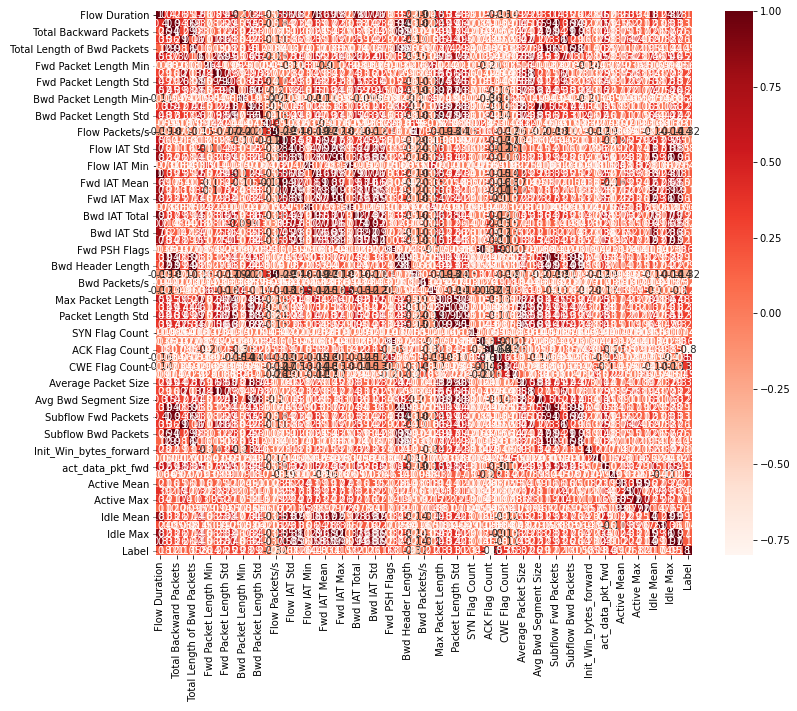

In [9]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.181543
 Total Fwd Packets              0.122131
 Total Backward Packets         0.103535
Total Length of Fwd Packets     0.131034
 Total Length of Bwd Packets    0.057835
                                  ...   
Idle Mean                       0.168916
 Idle Std                       0.049238
 Idle Max                       0.151579
 Idle Min                       0.181208
Label                           1.000000
Name: Label, Length: 65, dtype: float64

In [11]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max     0.255351
 Fwd Packet Length Mean    0.264531
 Fwd Packet Length Std     0.246241
Bwd Packet Length Max      0.286804
 Bwd Packet Length Min     0.281618
 Bwd Packet Length Mean    0.286445
 Bwd Packet Length Std     0.268412
 Flow Packets/s            0.319039
Bwd IAT Total              0.211461
Fwd PSH Flags              0.301738
Fwd Packets/s              0.320946
 Min Packet Length         0.202477
 Max Packet Length         0.302743
 Packet Length Mean        0.311200
 Packet Length Std         0.308873
 Packet Length Variance    0.230674
 RST Flag Count            0.301738
 ACK Flag Count            0.800466
 URG Flag Count            0.549553
 CWE Flag Count            0.345987
 Down/Up Ratio             0.303562
 Average Packet Size       0.320037
 Avg Fwd Segment Size      0.264531
 Avg Bwd Segment Size      0.286445
 min_seg_size_forward      0.390878
Label                      1.000000
Name: Label, dtype: float64